# Breast Cancer - IA 2024

-- TODO: depois temos de fazer indice

## Business understanding

#### Business Goals

We aim to improve healthcare outcomes using the breast cancer dataset. Our goal is to develop predictive models that reduce misdiagnosis rates, minimize unnecessary procedures, and enhance treatment outcomes for patients with breast masses.

#### Data Model Problem Definition

Our task is to create a model that accurately classifies breast masses as malignant or benign using features from digitized images. This model will help healthcare professionals make timely and accurate diagnoses, improving treatment planning and patient management.

#### Data Model Goals

Our goals include building an accurate predictive model and identifying key features that contribute to classification. We aim to enhance model interpretability and integration into clinical practice for better patient care.

## Data Understanding

The Breast Cancer dataset consists of features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics of cell nuclei present in the image.

### About the Dataset

The dataset contains 569 registers and is composed of 32 attributes. 62.7% being of type B (Benign) and 37.3% being of type M (Malignant)

These attributes are:
- **ID**: Unique identifier for each sample.
- **Diagnosis**: The diagnosis of the breast mass (Malignant - M, Benign - B).
- **Radius Mean**: Mean of distances from the center to points on the perimeter.
- **Texture Mean**: Standard deviation of gray-scale values.
- **Perimeter Mean**: Mean size of the core tumor.
- **Area Mean**: Mean area of the core tumor.
- **Smoothness Mean**: Mean smoothness of the cell nuclei.
- **Compactness Mean**: Mean compactness of the cell nuclei.
- **Concavity Mean**: Mean concavity of the cell nuclei.
- **Concave Points Mean**: Mean number of concave portions of the contour.
- **Symmetry Mean**: Mean symmetry of the cell nuclei.
- **Fractal Dimension Mean**: Mean "coastline approximation" - 1.
- **Radius SE**: Standard error for the mean of distances from the center to points on the perimeter.
- **Texture SE**: Standard error for the standard deviation of gray-scale values.
- **Perimeter SE**: Standard error for the mean size of the core tumor.
- **Area SE**: Standard error for the mean area of the core tumor.
- **Smoothness SE**: Standard error for the mean smoothness of the cell nuclei.
- **Compactness SE**: Standard error for the mean compactness of the cell nuclei.
- **Concavity SE**: Standard error for the mean concavity of the cell nuclei.
- **Concave Points SE**: Standard error for the mean number of concave portions of the contour.
- **Symmetry SE**: Standard error for the mean symmetry of the cell nuclei.
- **Fractal Dimension SE**: Standard error for the mean "coastline approximation" - 1.
- **Radius Worst**: Largest radius measured from the center to the perimeter of the tumor.
- **Texture Worst**: Highest variation in gray-scale values in the tumor.
- **Perimeter Worst**: Largest perimeter measurement of the tumor.
- **Area Worst**: Largest area measurement of the tumor.
- **Smoothness Worst**: Highest level of surface irregularity measured on the tumor cells.
- **Compactness Worst**: Greatest density of the tumor cells (closeness of the cells).
- **Concavity Worst**: Largest concavity observed in the tumor cell contours.
- **Concave Points Worst**: Maximum number of concave points detected on the tumor contour.
- **Symmetry Worst**: Least symmetry observed in the tumor cells.
- **Fractal Dimension Worst**: Highest complexity observed in the tumor cell borders.

Target Variable:
- **Diagnosis**: Malignant (M) or Benign (B).

In [20]:
import pandas
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df = pandas.read_csv("../data/data.csv")

df.drop(['id'], axis=1, inplace=True) # Drop the 'id' column as it is not needed for analysis

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


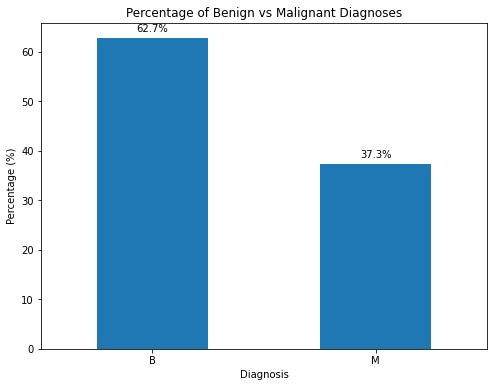

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
diagnosis_counts = df['diagnosis'].value_counts(normalize=True) * 100  # Convert to percentages

plt.figure(figsize=(8, 6))
ax = diagnosis_counts.plot(kind='bar') # Create a bar plot for percentages
plt.title('Percentage of Benign vs Malignant Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0) 

# Show the percentages on the bars for better understanding
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
df.describe()

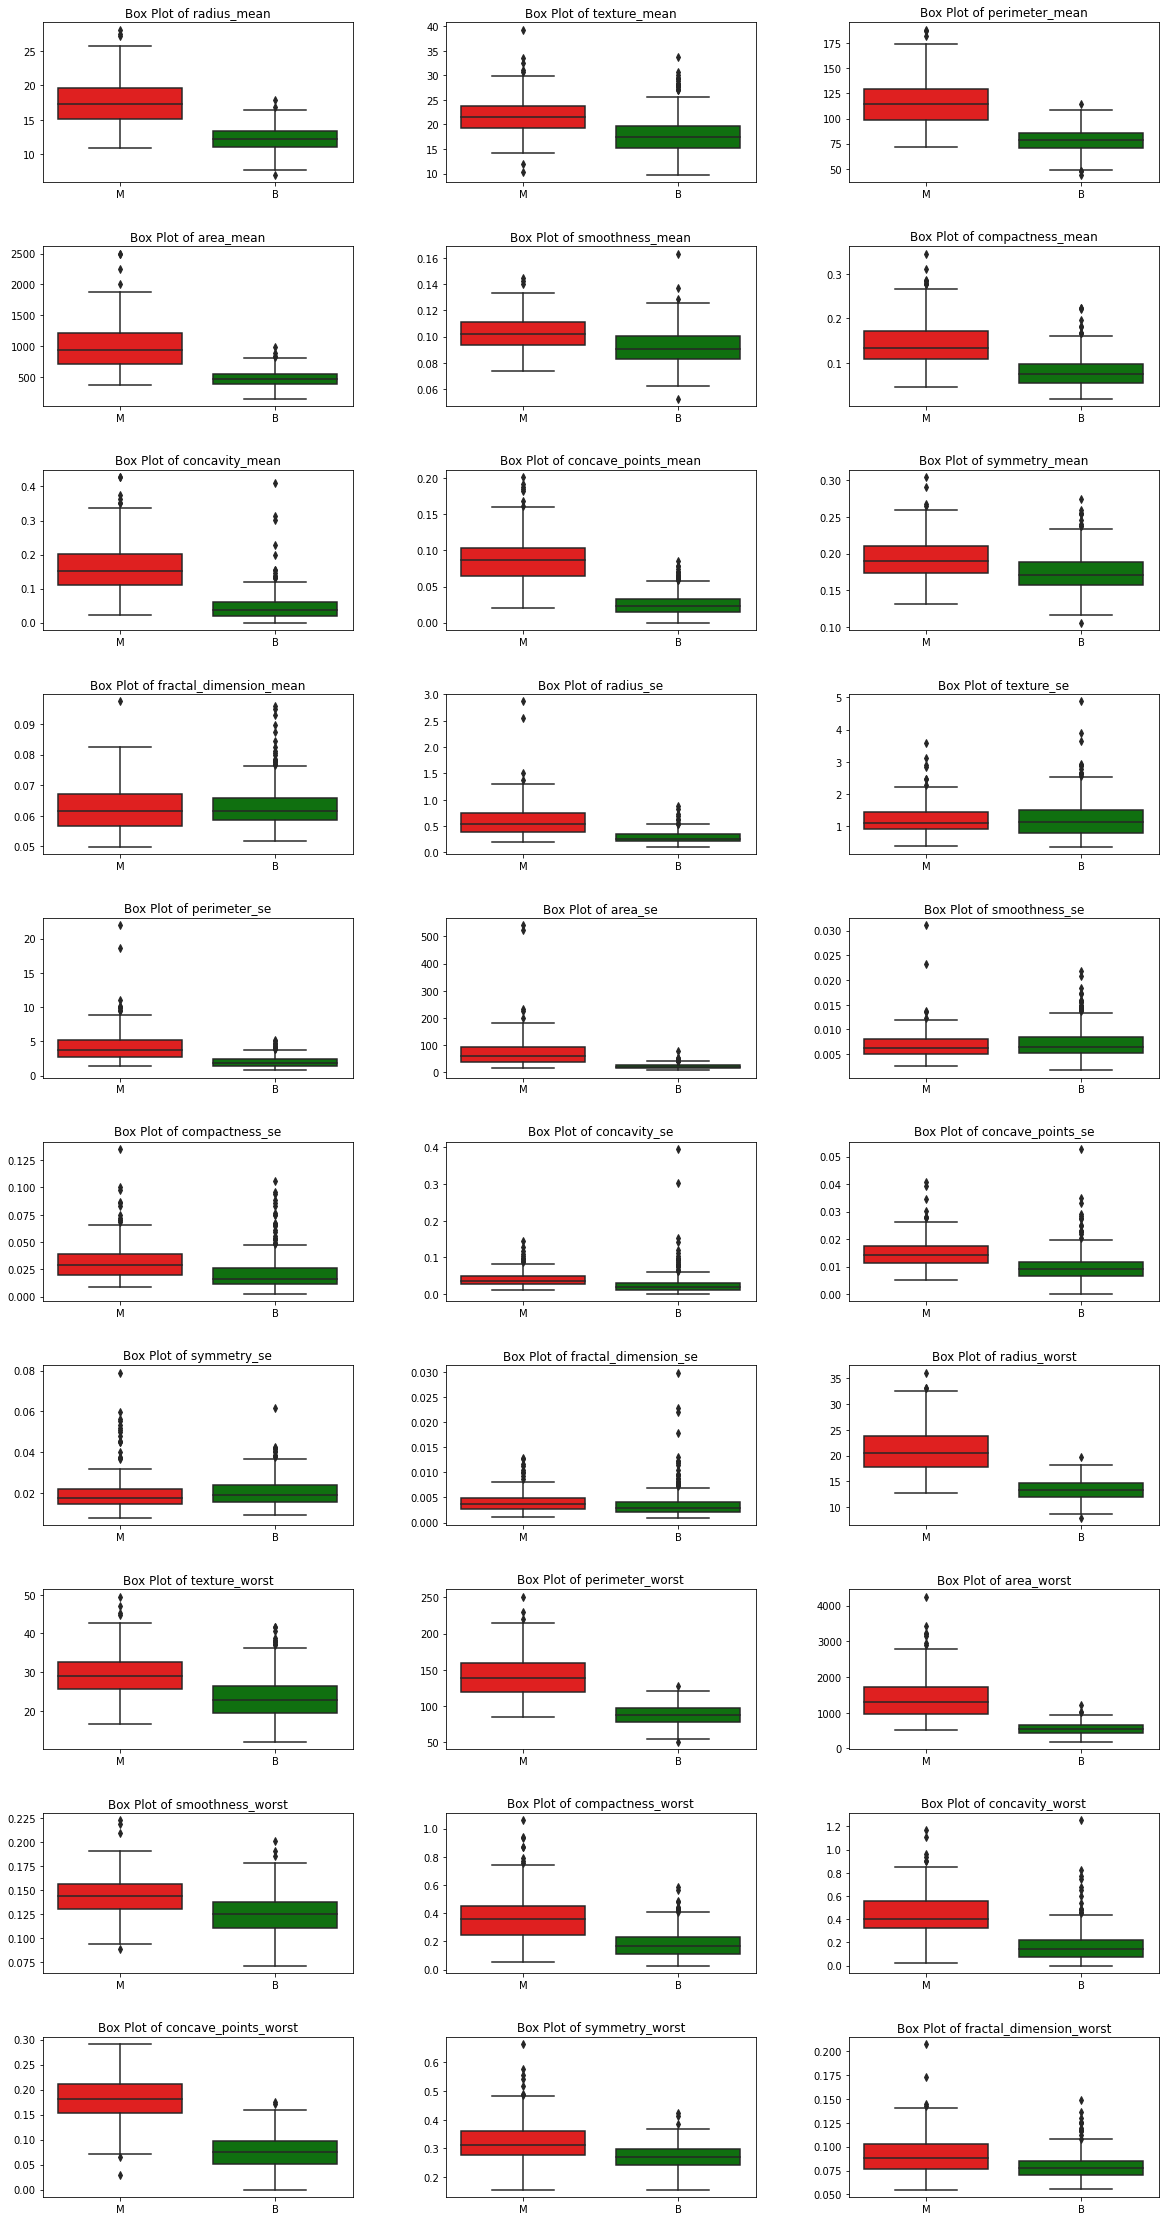

In [22]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist() # Get the numeric columns

n_cols = 3  # Number of columns for subplots
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows)) # Create subplots
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust the space between subplots

custom_palette = {'B': 'green', 'M': 'red'}  # B for benign, M for malignant

# Plot each boxplot on a subplot
for index, column in enumerate(numeric_columns):
    row = index // n_cols
    col = index % n_cols

    sb.boxplot(x='diagnosis', y=column, data=df, ax=axs[row, col], palette=custom_palette) # Create the boxplot with grouping by 'diagnosis' and custom colors
    axs[row, col].set_title(f'Box Plot of {column}')
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel('')

if len(numeric_columns) % n_cols != 0: # Hide the last subplot if it is not used
    for ax in axs.flat[len(numeric_columns):]:
        ax.set_visible(False)

plt.show()


explicar outliers 